In [4]:
# Import Package
import numpy as np 
import pandas as pd 
import os
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_classif

# Import Data

data = pd.read_excel("GermanCreditData.xlsx")

In [5]:
# Install the Scorecard Model Algorithm Package
!pip install scorecardpy
import scorecardpy as sc

In [6]:
data.head()

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Bad,Good
0,1,6,4,3,1169,5,5,4,3,1,...,67,3,2,2,3,1,2,1,0,1
1,2,48,2,3,5951,1,3,2,2,1,...,22,3,2,1,3,1,1,1,1,0
2,4,12,4,6,2096,1,4,2,3,1,...,49,3,2,1,2,2,1,1,0,1
3,1,42,2,2,7882,1,4,2,3,3,...,45,3,3,1,3,2,1,1,0,1
4,1,24,3,0,4870,1,3,3,3,1,...,53,3,3,2,3,2,1,1,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Checking   1000 non-null   int64 
 1   Duration   1000 non-null   int64 
 2   History    1000 non-null   int64 
 3   Purpose    1000 non-null   object
 4   Amount     1000 non-null   int64 
 5   Savings    1000 non-null   int64 
 6   Emploed    1000 non-null   int64 
 7   Installp   1000 non-null   int64 
 8   marital    1000 non-null   int64 
 9   Coapp      1000 non-null   int64 
 10  Resident   1000 non-null   int64 
 11  Property   1000 non-null   int64 
 12  Age        1000 non-null   int64 
 13  Other      1000 non-null   int64 
 14  housing    1000 non-null   int64 
 15  Existcr    1000 non-null   int64 
 16  Job        1000 non-null   int64 
 17  Depends    1000 non-null   int64 
 18  Telephone  1000 non-null   int64 
 19  Foreign    1000 non-null   int64 
 20  Bad        1000 non-null   int6

In [8]:
data.shape

(1000, 22)

In [9]:
# Data Cleaning

data.isnull().values.sum()

0

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe()

,Checking,Duration,History,Amount,Savings,Emploed,Installp,marital,Coapp,Resident,...,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Bad,Good
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,3271.258000,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,...,35.546000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,1.037000,0.300000,0.700000
std,1.257638,12.058814,1.08312,2822.736876,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,...,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487,0.458487
min,1.000000,4.000000,0.00000,250.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,12.000000,2.00000,1365.500000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,...,27.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,18.000000,2.00000,2319.500000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,...,33.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,4.000000,24.000000,4.00000,3972.250000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,...,42.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,4.000000,72.000000,4.00000,18424.000000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,...,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000


In [12]:
# Since the columns 'Bad' and 'Good' show the same values differently, we can remove the 'Bad' column to remove confusion
data = data.drop('Bad', 1)

In [13]:
data.Purpose.value_counts()

3    280
0    234
2    181
1    103
9     97
6     50
5     22
X     12
4     12
8      9
Name: Purpose, dtype: int64

In [14]:
# Since we have some 'X' values in this columns, we need to replace it with 'Other' cateogory i.e '9' for better analysis
data['Purpose'].replace('X','9',inplace=True)

In [15]:
data.Purpose.value_counts()

3    280
0    234
2    181
1    103
9     97
6     50
5     22
9     12
4     12
8      9
Name: Purpose, dtype: int64

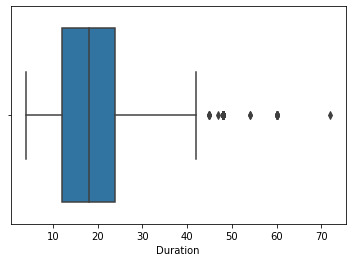

In [16]:
sns.boxplot(data['Duration'])

In [17]:
data[data.Duration >=60].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [18]:
# Removing Outliers
data.drop(data[(data['Duration'] >= 60)].index, inplace=True)

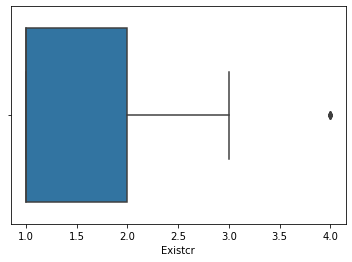

In [19]:
sns.boxplot(data['Existcr'])

In [20]:
data[data.Existcr >=4].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

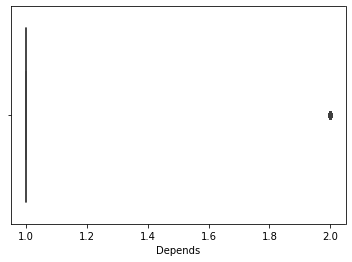

In [21]:
sns.boxplot(data['Depends'])

In [22]:
data[data.Depends >=2].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

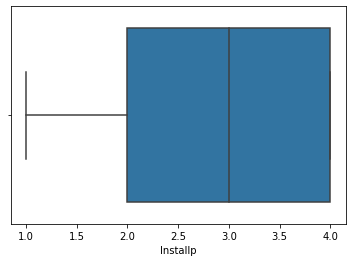

In [23]:
sns.boxplot(data['Installp'])

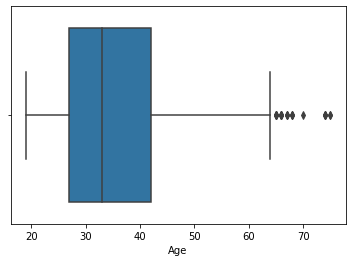

In [24]:
sns.boxplot(data['Age'])

In [25]:
data[data.Age >=70].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [26]:
# Removing Outliers
data.drop(data[(data['Age'] >= 70)].index, inplace=True)

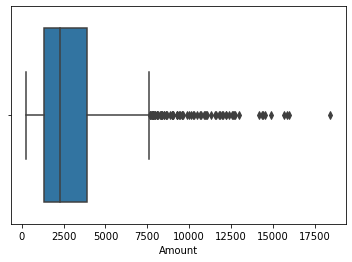

In [27]:
sns.boxplot(data['Amount'])

In [28]:
data[data.Amount >=17500].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [29]:
# Removing Outliers
data.drop(data[(data['Amount'] >= 17500)].index, inplace=True)

In [30]:
# It is clear from these observations that there are certain outliers that need to be removed from the columns: DURATION, AMOUNT, AGE since their max values are quite
# large compartively to the mean values of these columns. Likewise, the boxplots also clearly show some values allowing for discrepency in the data

In [31]:
data['Checking'] = data['Checking'].values.astype(str)
data['History'] = data['History'].values.astype(str)
data['Purpose'] = data['Purpose'].values.astype(str)
data['Savings'] = data['Savings'].values.astype(str)
data['Emploed'] = data['Emploed'].values.astype(str)
data['marital'] = data['marital'].values.astype(str)
data['Property'] = data['Property'].values.astype(str)
data['Other'] = data['Other'].values.astype(str)
data['housing'] = data['housing'].values.astype(str)
data['Job'] = data['Job'].values.astype(str)
data['Telephone'] = data['Telephone'].values.astype(str)
data['Foreign'] = data['Foreign'].values.astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Checking   978 non-null    object
 1   Duration   978 non-null    int64 
 2   History    978 non-null    object
 3   Purpose    978 non-null    object
 4   Amount     978 non-null    int64 
 5   Savings    978 non-null    object
 6   Emploed    978 non-null    object
 7   Installp   978 non-null    int64 
 8   marital    978 non-null    object
 9   Coapp      978 non-null    int64 
 10  Resident   978 non-null    int64 
 11  Property   978 non-null    object
 12  Age        978 non-null    int64 
 13  Other      978 non-null    object
 14  housing    978 non-null    object
 15  Existcr    978 non-null    int64 
 16  Job        978 non-null    object
 17  Depends    978 non-null    int64 
 18  Telephone  978 non-null    object
 19  Foreign    978 non-null    object
 20  Good       978 non-null    int64

In [32]:
data = data.replace(r'^\s*$', np.nan, regex=True)

In [38]:
# Question 1 : Split dataset to <=12 months and >12 months

data1 = data[data.Duration <= 12]
data2 = data[data.Duration > 12]
data1.head()

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Property,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Good
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
8,4,12,2,3,3059,4,4,2,1,1,...,1,61,3,2,1,2,1,1,1,1
10,2,12,2,0,1295,1,2,3,2,1,...,3,25,3,1,1,3,1,1,1,0
12,2,12,2,3,1567,1,3,1,2,1,...,3,22,3,2,1,3,1,2,1,1


In [39]:
data2.head()

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Property,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Good
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,0
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,0
5,4,36,2,6,9055,5,3,2,3,1,...,4,35,3,3,1,2,2,2,1,1
6,4,24,2,2,2835,3,5,3,3,1,...,2,53,3,2,1,3,1,1,1,1


In [40]:
data2.columns

Index(['Checking', 'Duration', 'History', 'Purpose', 'Amount', 'Savings',
       'Emploed', 'Installp', 'marital', 'Coapp', 'Resident', 'Property',
       'Age', 'Other', 'housing', 'Existcr', 'Job', 'Depends', 'Telephone',
       'Foreign', 'Good'],
      dtype='object')

In [41]:
data.shape

(978, 21)

In [42]:
data1.shape

(354, 21)

In [43]:
# Feature filter and make target variable "0/1"
data1 = sc.var_filter(data1, y="Good")

[INFO] filtering variables ...


In [46]:
# Question 2 : Split the data to Train and Test set
# Getting Independent and Dependent Variables for Subset 1

x1 = data1.loc[:,data1.columns != 'Good']
y1 = data1.loc[:,data1.columns == 'Good']

In [80]:
# Splitting Data Subset 1 
# Divide the data into Train and Test (7:3)

from sklearn.model_selection import train_test_split
x1_train1, x1_test1 = train_test_split(x1,  test_size = 0.3, random_state = 0)
x1_train1
# Checking the Shapes

#print("Shape of x1_train1 :", x1_train1.shape)
#print("Shape of y1_train :", y1_train1.shape)
#print("Shape of x1_test :", x1_test1.shape)

,History,Other,Installp,Duration,Resident,Emploed,Purpose,Age,Coapp,Amount,Checking,Foreign,Property,Depends,housing,marital,Savings,Existcr
732,2,3,4,8,2,4,3,44,3,760,2,1,1,1,2,2,1,1
305,2,3,4,6,2,3,2,33,1,1543,4,1,1,1,2,1,4,1
436,2,3,2,6,4,4,5,23,1,660,4,1,1,1,1,4,3,1
797,4,3,2,12,4,2,2,22,1,1258,4,1,2,1,1,2,1,2
358,2,3,4,12,2,3,3,28,1,776,4,1,1,1,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,4,1,4,12,4,3,0,38,1,2171,1,2,2,1,2,3,1,2
485,3,3,4,6,4,1,0,47,1,1209,2,1,2,1,2,3,1,1
281,2,3,4,12,2,3,2,50,1,1574,4,1,1,1,2,3,1,1
117,4,3,2,10,3,2,2,27,2,2132,1,2,1,1,1,2,5,2


In [48]:
data2.shape

(624, 21)

In [49]:
# Getting Independent and Dependent Variables for Subset 2

x2 = data2.loc[:,data2.columns != 'Good']
y2 = data2.loc[:,data2.columns == 'Good']

In [50]:
# Splitting Data 2
# Divide the data into Train and Test (7:3)

from sklearn.model_selection import train_test_split
x2_train2, x2_test2, y2_train2, y2_test2 = train_test_split(x2, y2, test_size = 0.3, random_state = 0)

# Checking the Shapes

print("Shape of x2_train2 :", x2_train2.shape)
print("Shape of y2_train :", y2_train2.shape)
print("Shape of x2_test :", x2_test2.shape)

Shape of x2_train2 : (436, 20)
Shape of y2_train : (436, 1)
Shape of x2_test : (188, 20)


In [51]:
# Question 3 : Feature Selection

# Subset 1 : Data1 <= 12 months
x1_train1_num = x1_train1.select_dtypes('number')
x1_train1_cat = x1_train1.select_dtypes('object')
x1_train1_num

,Installp,Duration,Resident,Age,Coapp,Amount,Depends,Existcr
732,4,8,2,44,3,760,1,1
305,4,6,2,33,1,1543,1,1
436,2,6,4,23,1,660,1,1
797,2,12,4,22,1,1258,1,2
358,4,12,2,28,1,776,1,1
...,...,...,...,...,...,...,...,...
892,4,12,4,38,1,2171,1,2
485,4,6,4,47,1,1209,1,1
281,4,12,2,50,1,1574,1,1
117,2,10,3,27,2,2132,1,2


In [52]:
x1_train1_cat

,History,Other,Emploed,Purpose,Checking,Foreign,Property,housing,marital,Savings
732,2,3,4,3,2,1,1,2,2,1
305,2,3,3,2,4,1,1,2,1,4
436,2,3,4,5,4,1,1,1,4,3
797,4,3,2,2,4,1,2,1,2,1
358,2,3,3,3,4,1,1,2,4,1
...,...,...,...,...,...,...,...,...,...,...
892,4,1,3,0,1,2,2,2,3,1
485,3,3,1,0,2,1,2,2,3,1
281,2,3,3,2,4,1,1,2,3,1
117,4,3,2,2,1,2,1,1,2,5


In [53]:
# Anova Test

fs = SelectKBest(score_func=f_classif,k=2)
fit = fs.fit(x1_train1_num,y1_train1)
x1_train_fs = fit.transform(x1_train1_num)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# Select Age, Duration

Feature 0: 7.804817
Feature 1: 8.334852
Feature 2: 1.434650
Feature 3: 10.914330
Feature 4: 2.471571
Feature 5: 1.133618
Feature 6: 1.698468
Feature 7: 4.365419


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
# Chi-Square Test

test = SelectKBest(chi2,k='all')
fit = test.fit(x1_train1_cat,y1_train1)
x1_train1_test = fit.transform(x1_train1_cat)

for i in range(len(test.scores_)):
	print('Feature %d: %f' % (i, test.scores_[i]))
 
# Select History, Checking

Feature 0: 8.294756
Feature 1: 0.623945
Feature 2: 1.834747
Feature 3: 0.113520
Feature 4: 12.841858
Feature 5: 0.306288
Feature 6: 4.895819
Feature 7: 0.015799
Feature 8: 0.143065
Feature 9: 1.138703


In [55]:
# Subset 2 : Data1 > 12 months
x2_train2_num = x2_train2.select_dtypes('number')
x2_train2_cat = x2_train2.select_dtypes('object')
x2_train2_num

,Duration,Amount,Installp,Coapp,Resident,Age,Existcr,Depends
571,30,5954,3,2,2,38,1,1
654,24,2346,4,1,3,35,2,1
748,21,5248,1,1,3,26,1,1
631,18,1553,4,1,3,44,1,1
781,24,1940,4,1,4,60,1,1
...,...,...,...,...,...,...,...,...
476,39,2569,4,1,4,24,1,1
14,15,1403,2,1,4,28,1,1
605,24,2828,4,1,4,22,1,1
334,24,4110,3,1,4,23,2,2


In [56]:
x2_train2_cat

,Checking,History,Purpose,Savings,Emploed,marital,Property,Other,housing,Job,Telephone,Foreign
571,4,4,3,1,4,3,3,3,2,3,1,1
654,4,4,1,1,4,3,3,3,2,3,2,1
748,4,2,1,5,3,3,3,3,2,3,1,1
631,1,1,2,1,3,3,3,1,2,3,1,1
781,4,4,0,4,5,3,1,3,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
476,4,2,1,3,3,3,3,3,2,3,1,1
14,1,2,0,1,3,2,3,3,1,3,1,1
605,1,1,2,3,3,3,1,2,2,3,2,1
334,1,0,2,1,5,3,4,1,1,3,1,1


In [57]:
# Anova Test

fs = SelectKBest(score_func=f_classif,k=2)
fit = fs.fit(x2_train2_num,y2_train2)
x2_train2_fs = fit.transform(x2_train2_num)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# Select Duration

Feature 0: 8.660862
Feature 1: 5.414030
Feature 2: 0.202630
Feature 3: 0.858768
Feature 4: 0.486811
Feature 5: 0.410330
Feature 6: 0.564353
Feature 7: 1.146640


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
# Chi-Square Test

test = SelectKBest(chi2,k='all')
fit = test.fit(x2_train2_cat,y2_train2)
x2_train2_test = fit.transform(x2_train2_cat)

for i in range(len(test.scores_)):
	print('Feature %d: %f' % (i, test.scores_[i]))
 
# Select History, Checking, Savings

Feature 0: 37.496463
Feature 1: 9.238728
Feature 2: 0.905851
Feature 3: 24.393887
Feature 4: 3.599172
Feature 5: 0.073827
Feature 6: 1.430624
Feature 7: 1.327910
Feature 8: 0.124711
Feature 9: 0.095071
Feature 10: 0.530863
Feature 11: 0.000347


In [81]:
# Question 4 

# Subset 1
x1_train1 = x1_train1[['Age','Duration','History','Checking']]
x1_test1 = x1_test1[['Age','Duration','History','Checking']]
x1_train1

,Age,Duration,History,Checking
732,44,8,2,2
305,33,6,2,4
436,23,6,2,4
797,22,12,4,4
358,28,12,2,4
...,...,...,...,...
892,38,12,4,1
485,47,6,3,2
281,50,12,2,4
117,27,10,4,1


In [75]:
# Binning

from scorecardpy import woebin
bins = sc.woebin(data1, y='Good')

[INFO] creating woe binning ...


In [61]:
bins

{'History':   variable    bin  count  count_distr  good  bad   badprob       woe  \
 0  History  1%,%0     23     0.064972    13   10  0.434783 -1.576088   
 1  History      2    204     0.576271    50  154  0.754902 -0.188794   
 2  History  3%,%4    127     0.358757    12  115  0.905512  0.946302   
 
      bin_iv  total_iv breaks  is_special_values  
 0  0.216698  0.476996  1%,%0              False  
 1  0.021654  0.476996      2              False  
 2  0.238644  0.476996  3%,%4              False  ,
 'Other':   variable    bin  count  count_distr  good  bad   badprob       woe  \
 0    Other  2%,%1     46     0.129944    17   29  0.630435 -0.779641   
 1    Other      3    308     0.870056    58  250  0.811688  0.147294   
 
      bin_iv  total_iv breaks  is_special_values  
 0  0.095681  0.113757  2%,%1              False  
 1  0.018077  0.113757      3              False  ,
 'Installp':    variable         bin  count  count_distr  good  bad   badprob       woe  \
 0  Installp  [

{'History': <Figure size 432x288 with 2 Axes>,
 'Other': <Figure size 432x288 with 2 Axes>,
 'Installp': <Figure size 432x288 with 2 Axes>,
 'Duration': <Figure size 432x288 with 2 Axes>,
 'Resident': <Figure size 432x288 with 2 Axes>,
 'Emploed': <Figure size 432x288 with 2 Axes>,
 'Purpose': <Figure size 432x288 with 2 Axes>,
 'Age': <Figure size 432x288 with 2 Axes>,
 'Coapp': <Figure size 432x288 with 2 Axes>,
 'Amount': <Figure size 432x288 with 2 Axes>,
 'Checking': <Figure size 432x288 with 2 Axes>,
 'Foreign': <Figure size 432x288 with 2 Axes>,
 'Property': <Figure size 432x288 with 2 Axes>,
 'Depends': <Figure size 432x288 with 2 Axes>,
 'housing': <Figure size 432x288 with 2 Axes>,
 'marital': <Figure size 432x288 with 2 Axes>,
 'Savings': <Figure size 432x288 with 2 Axes>,
 'Existcr': <Figure size 432x288 with 2 Axes>}

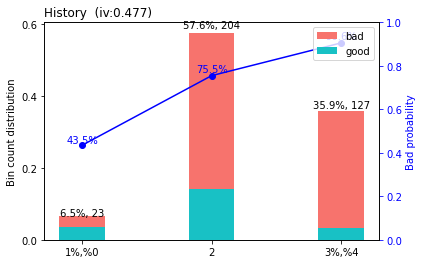

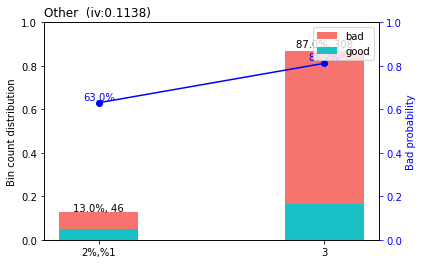

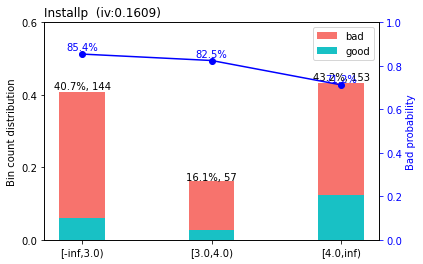

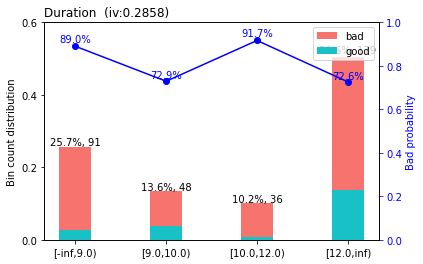

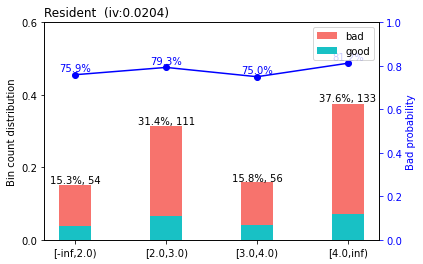

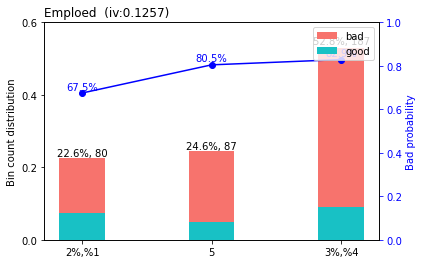

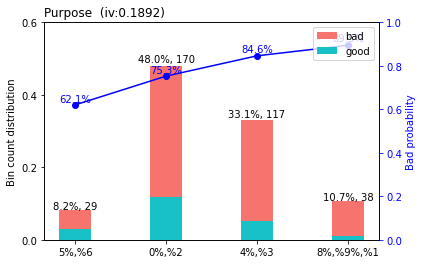

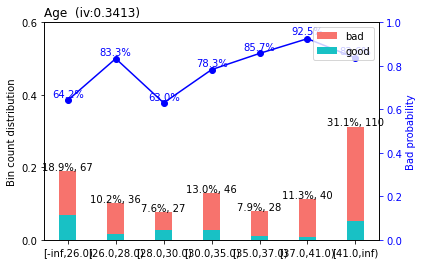

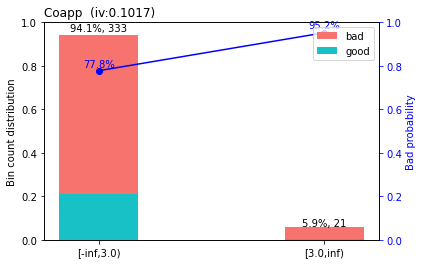

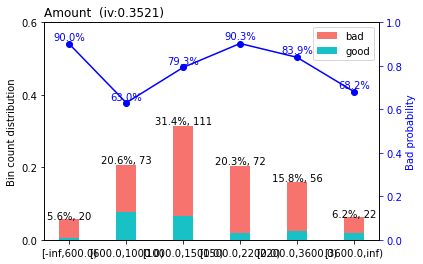

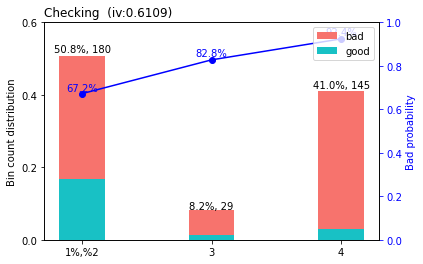

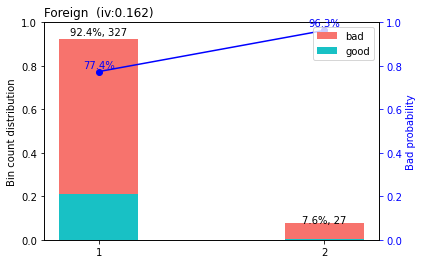

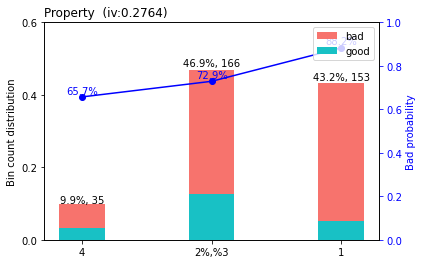

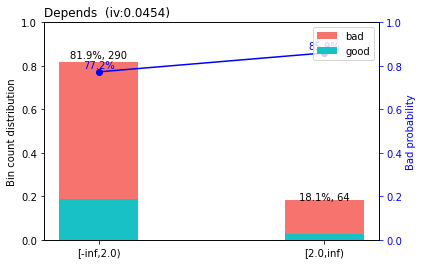

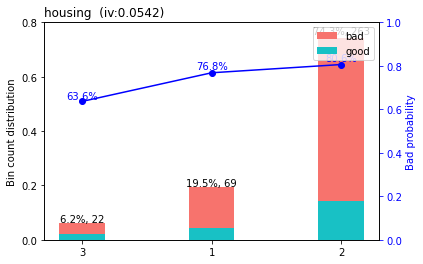

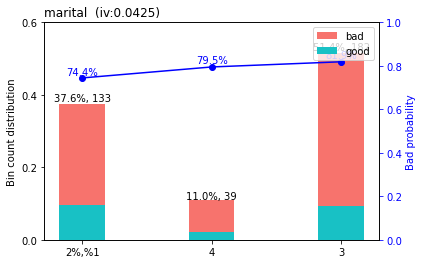

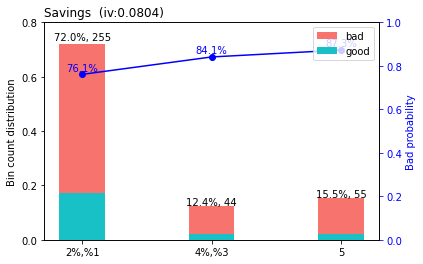

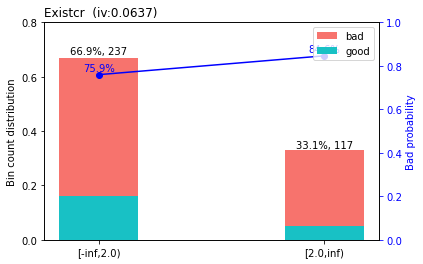

In [63]:
# Graphically display the binning results for each variable

sc.woebin_plot(bins)

In [82]:
# Hence, we have automatically created bins for each variables in the dataset. We can clearly see that the variables we chose have high IV values as well, which indicates that
# these variables have high predictive power to prdeict the dependent variable in question. Also, we can continue to model the data using the binning obtained.

# Convert Train and Test to Binning format respectively
train_woe = sc.woebin_ply(x1_train1, bins)
test_woe = sc.woebin_ply(x1_test1, bins)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [84]:
train_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 995
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Duration_woe  247 non-null    float64
 1   Age_woe       247 non-null    float64
 2   Checking_woe  247 non-null    float64
 3   History_woe   247 non-null    float64
dtypes: float64(4)
memory usage: 9.6 KB


In [66]:
# Imbalanced Data
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
x1_train1,y1_train1 = os.fit_resample(x1_train1,y1_train1)
x2_train2,y2_train2 = os.fit_resample(x2_train2,y2_train2)

In [67]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
log1.fit(x1_train1, y1_train1)
print(log1.coef_)
print(log1.intercept_)

[[ 0.01910817 -0.25685624  0.3846071   0.50318765]]
[-0.13906059]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
# Predicted Probability

train_pred = log1.predict_proba(x1_train1)[:,1]
test_pred = log1.predict_proba(x1_test1)[:,1]

In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lin2 = LinearRegression()
lin2.fit(x1_train1, y1_train1)
print(lin2.coef_)
print(lin2.intercept_)

[[ 0.00387317 -0.02905439  0.13345618  0.11548176]]
[0.06702403]


In [ ]:
# Scorecard
card1 = sc.scorecard(bins, log1, x1_train1.columns)
card2 = sc.scorecard(bins, lin2, x1_train1.columns)
card1

{'Age':    variable          bin  points
 20      Age  [-inf,26.0)     1.0
 21      Age  [26.0,28.0)    -0.0
 22      Age  [28.0,30.0)     1.0
 23      Age  [30.0,35.0)     0.0
 24      Age  [35.0,37.0)    -0.0
 25      Age  [37.0,41.0)    -1.0
 26      Age   [41.0,inf)    -0.0, 'Checking':     variable    bin  points
 48  Checking  1%,%2    21.0
 49  Checking      3    -9.0
 50  Checking      4   -41.0, 'Duration':     variable          bin  points
 34  Duration   [-inf,9.0)    14.0
 35  Duration   [9.0,10.0)    -6.0
 36  Duration  [10.0,12.0)    20.0
 37  Duration   [12.0,inf)    -6.0, 'History':    variable    bin  points
 31  History  1%,%0    62.0
 32  History      2     7.0
 33  History  3%,%4   -37.0, 'basepoints':      variable  bin  points
 0  basepoints  NaN     398}

In [ ]:
card2

{'Age':    variable          bin  points
 20      Age  [-inf,26.0)     0.0
 21      Age  [26.0,28.0)    -0.0
 22      Age  [28.0,30.0)     0.0
 23      Age  [30.0,35.0)     0.0
 24      Age  [35.0,37.0)    -0.0
 25      Age  [37.0,41.0)    -0.0
 26      Age   [41.0,inf)    -0.0, 'Checking':     variable    bin  points
 48  Checking  1%,%2     5.0
 49  Checking      3    -2.0
 50  Checking      4   -10.0, 'Duration':     variable          bin  points
 34  Duration   [-inf,9.0)     2.0
 35  Duration   [9.0,10.0)    -1.0
 36  Duration  [10.0,12.0)     2.0
 37  Duration   [12.0,inf)    -1.0, 'History':    variable    bin  points
 31  History  1%,%0    15.0
 32  History      2     2.0
 33  History  3%,%4    -9.0, 'basepoints':      variable  bin  points
 0  basepoints  NaN     383}